In [1]:
%pylab qt5
%matplotlib inline
import scipy.stats
import scipy.constants as const
import scipy.optimize

Populating the interactive namespace from numpy and matplotlib


/home/ca/.local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['trunc', 'radians', 'cos', 'cosh', 'fabs', 'log', 'log1p', 'isnan', 'inf', 'frexp', 'sqrt', 'log2', 'gamma', 'floor', 'expm1', 'ldexp', 'isclose', 'tan', 'degrees', 'isinf', 'hypot', 'tanh', 'pi', 'e', 'log10', 'copysign', 'fmod', 'nan', 'exp', 'isfinite', 'sinh', 'ceil', 'sin', 'modf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
pylab.rcParams['figure.figsize'] = (10, 6)

In [3]:
import os

In [8]:
V = dict()
pab = dict()
pauf = dict()
csvs = [name for name in os.listdir() if name.endswith('grad.csv')]
for name in csvs:
    daten = loadtxt(name, delimiter=',', skiprows=1)
    print(name[:-8])
    T = float(name[:-8])
    V[T] = daten[:, 0]
    pab[T] = daten[:, 1]
    pauf[T] = daten[:, 2]

25
40
35
30
55
47.5
45
42.5
50


### Gruppe 2 (wir)

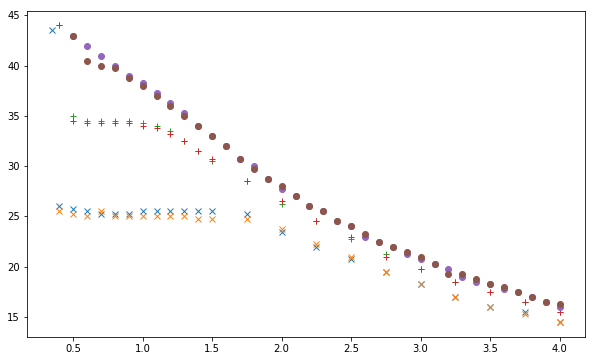

In [9]:
grp2 = {30:'x', 42.5:'+', 50:'o'}
args = []
for x in grp2:
    args.append(V[x])
    args.append(transpose([pab[x], pauf[x]]))
    args.append(grp2[x])
plt.plot(*args)

### Gruppe 1

In [10]:
# 25, 40, 47.5
# grad25 = loadtxt('./25grad.csv', delimiter=',', skiprows=1)
# V25, pab25, pauf25 = grad25[:, 0], grad25[:, 1], grad25[:, 2]
# grad425 = loadtxt('./42.5grad.csv', delimiter=',', skiprows=1)
# V425, pab425, pauf425 = grad425[:, 0], grad425[:, 1], grad425[:, 2]
# grad50 = loadtxt('./50grad.csv', delimiter=',', skiprows=1)
# V50, pab50, pauf50 = grad50[:, 0], grad50[:, 1], grad50[:, 2]

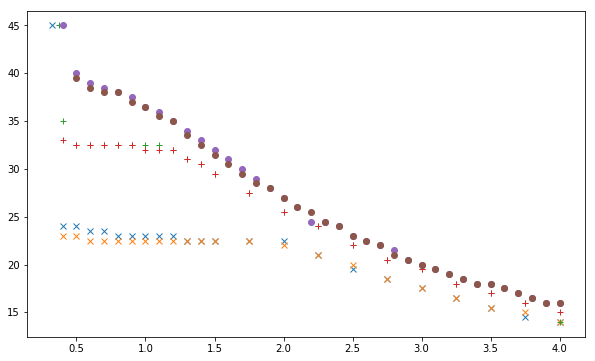

In [11]:
grp1 = {25:'x', 40:'+', 47.5:'o'}
args = []
for x in grp1:
    args.append(V[x])
    args.append(transpose([pab[x], pauf[x]]))
    args.append(grp1[x])
plt.plot(*args)

### Gruppe 3

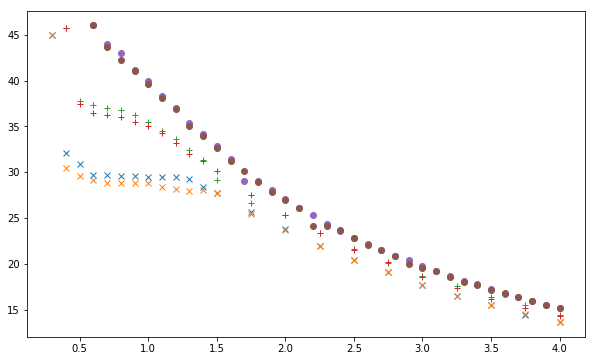

In [12]:
grp3 = {35:'x', 45:'+', 55:'o'}
args = []
for x in grp3:
    args.append(V[x])
    args.append(transpose([pab[x], pauf[x]]))
    args.append(grp3[x])
plt.plot(*args)

In [13]:
alle = dict(grp1); alle.update(grp2); alle.update(grp3)

In [14]:
# mitteln pab und pauf zu p
p = {}
for T in alle:
    p[T] = .5 * (pab[T] + pauf[T])
    p[T][where(isnan(p[T]))] = pab[T][where(isnan(p[T]))]

47.5 Grad: (Gruppe 1)
n R T = 7.5175839003391465 Joule
n1 = 0.0028197655586642252

50 Grad: (Gruppe 2)
n R T = 7.563094295876462 Joule
n2 = 0.002814889279564141

55 Grad: (Gruppe 3)
n R T = 6.854644628506384 Joule
n3 = 0.002512340490284236



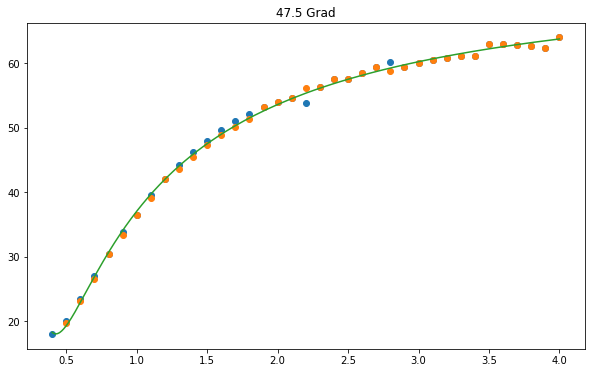

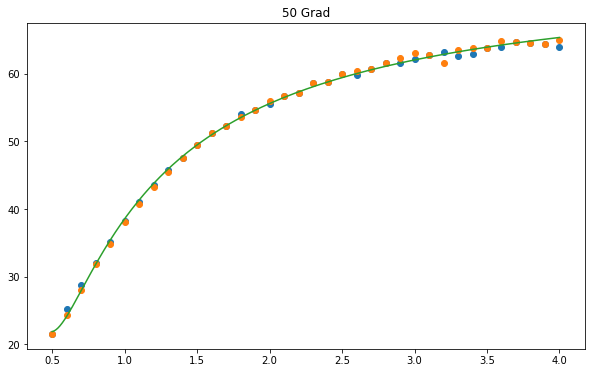

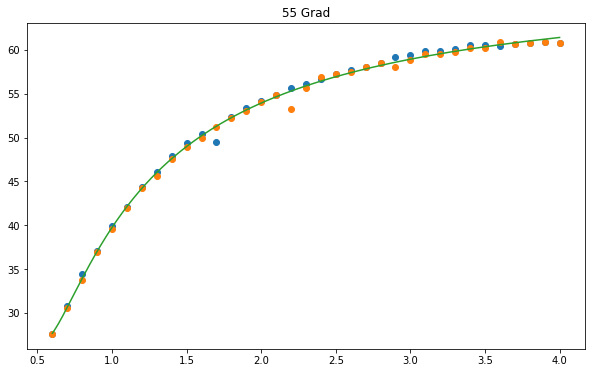

In [15]:
uberkrit = {47.5:1, 50:2, 55:3}
for T in uberkrit:
    _ = plt.figure()
    Vol = V[T]
    _ = plt.plot(Vol, transpose([pab[T]*Vol, pauf[T]*Vol]), 'o')
    c3, c2, c1, c0 = scipy.polyfit(1/Vol, p[T]*V[T], deg=3)
    n = c0 * .1 / const.R / (T + const.zero_Celsius)
    print(f'{T} Grad: (Gruppe {uberkrit[T]})')
    print(f'n R T = {c0 * .1} Joule')
    print(f'n{uberkrit[T]} = {n}')
    print()
    exec(f'n{uberkrit[T]} = {n}')
    x = linspace(min(1/Vol), max(1/Vol), 200)
    _ = plt.plot(1/x, c3*x**3 + c2*x**2 + c1*x + c0)
    _ = plt.title(f'{T} Grad')

Eigentlich wäre das ja eine Aufgabe für `scipy.optimize.curve_fit`  
Das Ergebnis lässt aber vor allem bei 47.5 Grad zu wünschen übrig

60.20482834750527 75.67757292562166 0.23430449075186854


(array([60.20482835, 75.67757293,  0.23430449]),
 array([0.60309334, 0.19214589, 0.00219786]))

array([0.01001736, 0.00253901, 0.00938037])

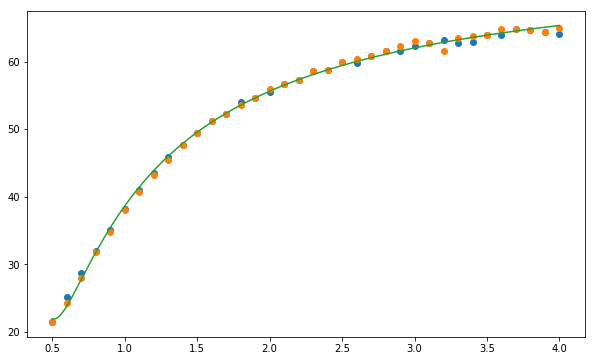

In [44]:
T = 50
f = lambda x, α, β, γ: -α*x + β/(1 - γ*x)
popt, pcov = scipy.optimize.curve_fit(f, 1/V[T], p[T]*V[T], [60, 70, 0.25],
                                      bounds=(0, [inf, inf, min(V[T])]), sigma=[0.55]*len(V[T]))
α, β, γ = popt
print(α, β, γ)
_ = plt.plot(V[T], transpose([pab[T]*V[T], pauf[T]*V[T]]), 'o')
x = linspace(min(1/V[T]), max(1/V[T]), 200)
plt.plot(1/x, f(x, α, β, γ))
popt, sqrt(diag(pcov))
sqrt(diag(pcov)) / popt

(7857000.0, 87.9)

49.59224268527869 67.50200858454481 0.22083472909598437


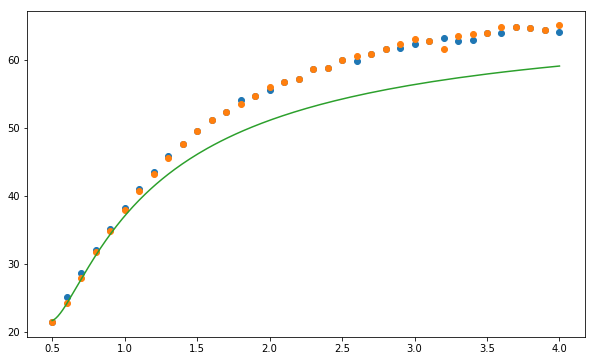

In [45]:
atrue = 0.7857 * 1e7; btrue = 87.9
atrue, btrue
αtrue = atrue * n**2
βtrue = n * const.R * (T + const.zero_Celsius) * 10
γtrue = btrue * n
print(αtrue, βtrue, γtrue)

_ = plt.plot(V[T], transpose([pab[T]*V[T], pauf[T]*V[T]]), 'o')
x = linspace(min(1/V[T]), max(1/V[T]), 200)
plt.plot(1/x, f(x, αtrue, βtrue, γtrue))

## Aufgabe 4

In [160]:
grp = {1:grp1, 2:grp2, 3:grp3}
n = {1:n1, 2:n2, 3:n3}
V_m = {}
for i in range(1, 3+1):
    for T in grp[i]:
        V_m[T] = V[T] / n[i]

In [695]:
args = []
leg = []
for T in sorted(alle.keys(), reverse=True):
    args.append(V_m[T] * 1e-3) # Liter / mol
    args.append(p[T])
    args.append('o-')
    leg.append(f'T = {T} °C')
ax = plt.plot(*args)
_ = plt.legend(ax, leg)
_ = plt.xlabel('V_m in L/mol')
_ = plt.ylabel('p in 100 kPa')

In [202]:
for T in alle:
    A = transpose([V_m[T] * 1e-3, p[T]])
    savetxt(f'molar{T}.csv', A, delimiter=',', header='V_m,p', comments='')

In [694]:
# for n, x in enumerate(V_m[42.5] * 1e-3):
#     print(f'{n: >2}: {x}')

### "manuelle" Abschätzung der Plateaus und ihrer Fehler

In [682]:
plat = {}
err_Vg = []
err_Vfl = []
plat[25] = array([
    V_m[25][-2],
    .5 * V_m[25][8] + .5 * V_m[25][9]
])
# Wir bestimmen die Fehler immer als ein vielfaches der Schrittweite
err_Vg.append(0.5 * (V_m[25][-1] - V_m[25][-2]))
err_Vfl.append(2 * (V_m[25][-1] - V_m[25][-2]))

plat[30] = array([
    V_m[30][-2],
    .8 * V_m[30][9] + .2 * V_m[30][10]
])
err_Vg.append(0.5 * (V_m[30][-1] - V_m[30][-2]))
err_Vfl.append(1 * (V_m[30][-1] - V_m[30][-2]))

plat[35] = array([
    .5*V_m[35][-2] + .5*V_m[35][-3],
    .5*V_m[35][12] + .5*V_m[35][13]
])
err_Vg.append(1.2 * (V_m[35][-1] - V_m[35][-2]))
err_Vfl.append(2 * (V_m[35][-1] - V_m[35][-2]))

plat[40] = array([
    .5*V_m[40][-2] + .5*V_m[40][-3],
    .5 * V_m[40][13] + .5 * V_m[40][14]
])
err_Vg.append(1 * (V_m[40][-1] - V_m[40][-2]))
err_Vfl.append(1 * (V_m[40][-1] - V_m[40][-2]))

plat[42.5] = array([
    V_m[42.5][-2],
    V_m[42.5][15]
])
err_Vg.append(0.5 * (V_m[42.5][-1] - V_m[42.5][-2]))
err_Vfl.append(1 * (V_m[42.5][-1] - V_m[42.5][-2]))

# plat[45] = array([
#     .3*V_m[45][-2] + .7*V_m[45][-3],
#     V_m[45][-4]
# ])

err_Vg = abs(array(err_Vg)); err_Vfl = abs(array(err_Vfl))

In [611]:
for obj in lines:
    obj.remove()
    
lines = []
druck = zeros(len(plat))
err_druck = zeros(len(plat)); ERR_druck = zeros(len(plat))
T_d = array(sorted(plat)) + const.zero_Celsius
for i in range(len(plat)):
    T = T_d[i] - const.zero_Celsius
    a, b = plat[T]
    xs = (a <= V_m[T]) & (V_m[T] <= b)
    
    druck[i] = mean(p[T][xs])
    err_druck[i] = 4*std(p[T][xs], ddof=1) / sqrt(len(p[T][xs]))
    ERR_druck[i] = .5 # syst. Fehler d. Messgeräts
    
    lines.append( plt.plot(array([a, b]) * 1e-3, [druck[i], druck[i]], '|k-')[0] )
    print(f'{T: >4} °C: {plat[T]*1e-3}  {druck[i]:f}'\
          f' +- {sqrt(err_druck[i]**2 + ERR_druck[i]**2):f}')

25.0 °C: [0.14185576 0.6649489 ]  22.826923 +- 0.629251
30.0 °C: [0.14185576 0.602887  ]  25.281250 +- 0.543993
35.0 °C: [0.17911585 0.49754403]  29.287500 +- 0.787174
40.0 °C: [0.15958774 0.40783532]  32.428571 +- 0.532929
42.5 °C: [0.17762688 0.35525376]  34.395833 +- 0.597448


In [442]:
V_m_crit = .245*1e3 # +-0.04
err_V_m_crit = 0.04*1e3
p_crit = 36.7 # +- 1.0
err_p_crit = 1.0

In [443]:
ll[0].remove()
ll = plt.errorbar([V_m_crit * 1e-3], [p_crit],
                  xerr=0.04, yerr=1.0,
                  fmt='go', markersize=10)

In [453]:
b = V_m_crit / 3
err_b = err_V_m_crit / 3
b, err_b

(81.66666666666667, 13.333333333333334)

In [449]:
a = 27 * p_crit * b**2
err_a = sqrt((27 * b**2 * err_p_crit)**2 +
             (27 * p_crit * 2*b * err_b)**2)
a, err_a
abs(27 * b**2 * err_p_crit), abs(27 * p_crit * 2*b * err_b)

(6608752.500000002, 2165460.3130108393)

(180075.00000000003, 2157960.0000000005)

Für nur ein Teilchen:

In [474]:
n = 1/const.N_A
V1 = b * 1e-6 * n
err_V1 = err_b * 1e-6 * n
V1, err_V1

(1.3561068830155174e-28, 2.2140520539028857e-29)

In [472]:
(3/(4*pi) * V1)**(1/3)
1/3 * (3/(4*pi) * V1)**(-2/3) * 3/(4*pi) * err_V1

3.1871446187985794e-10

1.7345004728155472e-11

In [478]:
a * 1e-7 * n**2, err_a * 1e-7 * n**2

(1.8222907426707878e-48, 5.971018406303819e-49)

## Aufgabe 7

$p_d \propto e^{(-A/T)}$

In [500]:
ERR_T = .2
err_T = .2

In [641]:
A = transpose([1/T_d, ones_like(T_d)])
W = diag(1/err_druck)
m, t, _, _, err_m = scipy.stats.linregress(1/T_d, log(druck))
[mw, tw], *_ = linalg.lstsq(W @ A, W @ log(druck), rcond=None)
print(f'ungewichtet: b = {b:f}, a = {a:f} +- {err_a:f}')
print(f'gewichtet:   b = {bw:}, a = {aw:}')

ungewichtet: b = 355.253760, a = 177.626880 +- 78.100113
gewichtet:   b = 10.758990859638477, a = -2279.8618367223016


<Container object of 3 artists>

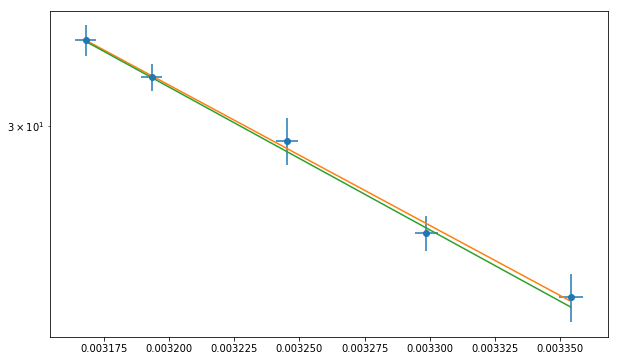

In [605]:
plt.errorbar(1/T_d, druck, fmt='o', xerr=1/T_d**2 * (err_T + ERR_T), yerr=err_druck+ERR_druck)
plt.yscale('log')
plt.plot(1/T_d, exp(m/T_d + t))
plt.plot(1/T_d, exp(mw/T_d + tw))

In [602]:
savetxt('arrhenius.csv',
        transpose([1/T_d, druck, 1/T_d**2 * (err_T + ERR_T), err_druck+ERR_druck]),
        header='t,p,err_t,err_p', comments='', delimiter=',')

$L = \dfrac{p_d (V_\mathrm{g} - V_\mathrm{fl})}{T}$

In [633]:
Vg = array([plat[T][0] for T in T_d - const.zero_Celsius])
Vfl = array([plat[T][1] for T in T_d - const.zero_Celsius])

In [639]:
L = druck * m * (Vg - Vfl)/T_d
L

array([89702.59185628, 86265.35569242, 67786.78399237, 57580.29040242,
       43353.29798892])

In [686]:
abs(err_m / m)
err_druck / druck
err_T / T_d
err_Vg / Vg
err_Vfl / Vfl

0.034868900146992045

array([0.01673649, 0.00847696, 0.02075912, 0.0056872 , 0.00950765])

array([0.0006708 , 0.00065974, 0.00064903, 0.00063867, 0.00063361])

array([0.09375   , 0.0625    , 0.26666667, 0.05555556, 0.1       ])

array([0.08      , 0.02941176, 0.16      , 0.02173913, 0.1       ])

In [692]:
err_L = m * druck * sqrt(err_Vg**2 + err_Vfl**2)sqrt(err_Vg**2 + err_Vfl**2) / T_d
L * .1, err_L *.1
err_L / L

(array([8970.25918563, 8626.53556924, 6778.67839924, 5758.02904024,
        4335.32979889]),
 array([ -940.30490114,  -370.9523066 , -1976.30738283,  -290.82438433,
         -969.40921352]))

array([-0.10482472, -0.04300131, -0.29154759, -0.05050763, -0.2236068 ])

In [693]:
savetxt('L.csv',
        transpose([T_d - const.zero_Celsius, L, sqrt(err_T**2 + ERR_T**2) * ones_like(T_d), err_L]),
        header='T,L,err_T,err_L', comments='', delimiter=',')